# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

!pip install citipy

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
#Starting URL for Weather API CALL

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#list of city data

city_data=[]

#print to logger 

print("Beginning Data Retrieval")
print("_" * 15)

#create counters
record_count = 1
set_count=1
#loop through all the cities in our list
for index, city in enumerate(cities):
    #group cities in sets of 50 for loggin purpose
    if (index %50 == 0 and index >= 50):
        set_count +=1
        record_count = 0
    #create endpoint URL with each city
    city_url= url + "&q=" + city
    
    #log the url record and set number
    print(f"Processing Record {record_count} of Set {set_count}|{city}")
    
    record_count +=1
    
    #Run an API request for each of the cities
    
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Extract out max temp humidity and cloudiness
        city_lat= city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append the city info into city data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity":city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date":city_date
            
            
        })
        
    except:
        print("City not found. Skipping....")
        pass
#Indicate that data loading is complete

print ("-------------------")
print("Data Retrieval Complete")
print("--------------------")



Beginning Data Retrieval
_______________
Processing Record 1 of Set 1|warqla
City not found. Skipping....
Processing Record 2 of Set 1|narsaq
Processing Record 3 of Set 1|mataura
Processing Record 4 of Set 1|punta arenas
Processing Record 5 of Set 1|bambanglipuro
City not found. Skipping....
Processing Record 6 of Set 1|bairiki
Processing Record 7 of Set 1|derzhavinsk
Processing Record 8 of Set 1|rikitea
Processing Record 9 of Set 1|saint-philippe
Processing Record 10 of Set 1|bethel
Processing Record 11 of Set 1|jamestown
Processing Record 12 of Set 1|itoman
Processing Record 13 of Set 1|anadyr
Processing Record 14 of Set 1|otofuke
Processing Record 15 of Set 1|ecatzingo
City not found. Skipping....
Processing Record 16 of Set 1|sitka
Processing Record 17 of Set 1|hermanus
Processing Record 18 of Set 1|ushuaia
Processing Record 19 of Set 1|bilma
Processing Record 20 of Set 1|seoul
Processing Record 21 of Set 1|illoqqortoormiut
City not found. Skipping....
Processing Record 22 of Set 1

Processing Record 42 of Set 4|beloha
Processing Record 43 of Set 4|beroroha
Processing Record 44 of Set 4|lincoln
Processing Record 45 of Set 4|viedma
Processing Record 46 of Set 4|jamiltepec
Processing Record 47 of Set 4|ambulu
Processing Record 48 of Set 4|tsnori
Processing Record 49 of Set 4|provideniya
Processing Record 0 of Set 5|port elizabeth
Processing Record 1 of Set 5|chatham
Processing Record 2 of Set 5|nikolskoye
Processing Record 3 of Set 5|dzhusaly
City not found. Skipping....
Processing Record 4 of Set 5|cacequi
Processing Record 5 of Set 5|savannah bight
Processing Record 6 of Set 5|saskylakh
Processing Record 7 of Set 5|la ronge
Processing Record 8 of Set 5|batemans bay
Processing Record 9 of Set 5|sungairaya
Processing Record 10 of Set 5|tome-acu
City not found. Skipping....
Processing Record 11 of Set 5|alibag
Processing Record 12 of Set 5|marsh harbour
Processing Record 13 of Set 5|bengkulu
Processing Record 14 of Set 5|leh
Processing Record 15 of Set 5|saint-pierre

Processing Record 40 of Set 8|kamina
Processing Record 41 of Set 8|bakal
Processing Record 42 of Set 8|tahta
Processing Record 43 of Set 8|morehead
Processing Record 44 of Set 8|shingu
Processing Record 45 of Set 8|joshimath
Processing Record 46 of Set 8|waingapu
Processing Record 47 of Set 8|ahipara
Processing Record 48 of Set 8|mersing
Processing Record 49 of Set 8|birao
Processing Record 0 of Set 9|maniitsoq
Processing Record 1 of Set 9|orebro
Processing Record 2 of Set 9|guane
Processing Record 3 of Set 9|izhma
Processing Record 4 of Set 9|barbar
City not found. Skipping....
Processing Record 5 of Set 9|vila franca do campo
Processing Record 6 of Set 9|padang
Processing Record 7 of Set 9|madison
Processing Record 8 of Set 9|praxedis guerrero
Processing Record 9 of Set 9|utiroa
City not found. Skipping....
Processing Record 10 of Set 9|sao filipe
Processing Record 11 of Set 9|waitati
Processing Record 12 of Set 9|tadine
Processing Record 13 of Set 9|abadiania
Processing Record 14 of

Processing Record 34 of Set 12|warner robins
Processing Record 35 of Set 12|shahr-e babak
Processing Record 36 of Set 12|broome
Processing Record 37 of Set 12|pingliang
Processing Record 38 of Set 12|sola
Processing Record 39 of Set 12|nioro
Processing Record 40 of Set 12|hamilton
-------------------
Data Retrieval Complete
--------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
#convert array to JASON into pandas
city_data_df = pd.DataFrame(city_data)

#extract relevant fields from the data frame

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file,index_label="City_ID")
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [50]:
#Display city data 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,narsaq,60.92,-46.05,33.80,43,100,19.46,GL,1579585175
1,mataura,-46.19,168.86,67.03,71,100,7.78,NZ,1579585160
2,punta arenas,-53.15,-70.92,55.40,66,75,17.22,CL,1579585177
3,bairiki,1.33,172.98,89.60,66,40,4.70,KI,1579585180
4,derzhavinsk,51.10,66.32,15.87,94,100,16.35,KZ,1579585180


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

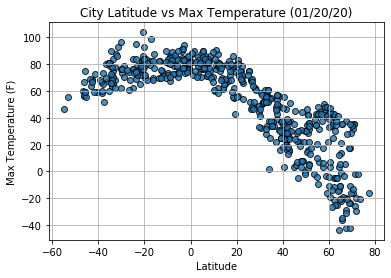

In [51]:
#build scatter plot for latitude vs temperature
plt.scatter(lats,
           max_temps,
           edgecolors="black", linewidth=1, marker="o",
            alpha =0.8,label = "Cities")

#incorporate the other graph properties

plt.title("City Latitude vs Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("output_data/Fig1.png")

#show plot
plt.show()

#### Latitude vs. Humidity Plot

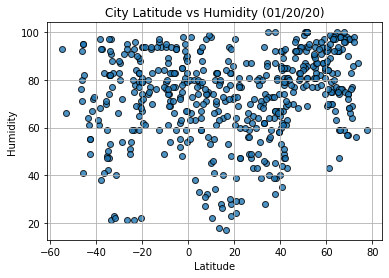

In [52]:
#build scatter plot for Latitude vs. Humidity Plot
plt.scatter(lats,
           humidity,
           edgecolors="black", linewidth=1, marker="o",
            alpha =0.8,label = "Cities")

#incorporate the other graph properties

plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("output_data/Fig2.png")

#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

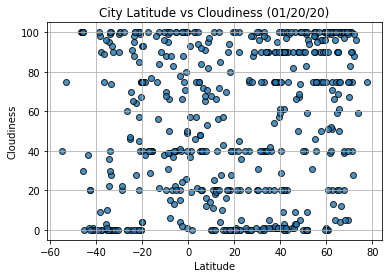

In [53]:
#build scatter plot for Latitude vs. Cloudiness Plot
plt.scatter(lats,
           cloudiness,
           edgecolors="black", linewidth=1, marker="o",
            alpha =0.8,label = "Cities")

#incorporate the other graph properties

plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("output_data/Fig3.png")

#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

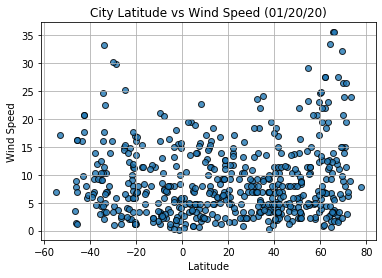

In [54]:
#build scatter plot for Latitude vs. Wind Speed Plot
plt.scatter(lats,
           wind_speed,
           edgecolors="black", linewidth=1, marker="o",
            alpha =0.8,label = "Cities")

#incorporate the other graph properties

plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("output_data/Fig4.png")

#show plot
plt.show()

## Linear Regression

In [55]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run regression on southern hemisphere
    (slope,intercept, rvalue,pvalue,stderr)= linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq ="y = "+ str(round(slope,2))+ " x + " + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15,color ="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is : {rvalue}")
    plt.show()

In [56]:
# Create Northern and Southern Hemisphere DataFrames
norther_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0 )]
souther_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0 )]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.8439054803259126


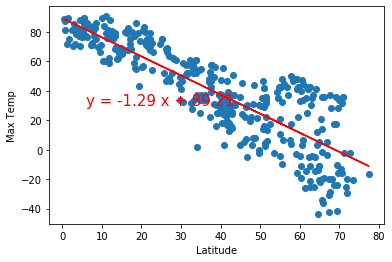

In [57]:
x_values = norther_hemi_df["Lat"]
y_values = norther_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,30))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5559292088890698


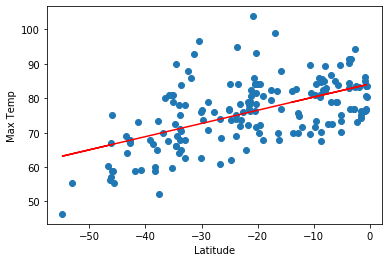

In [58]:
x_values = souther_hemi_df["Lat"]
y_values = souther_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-30,40))



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.38472337706785076


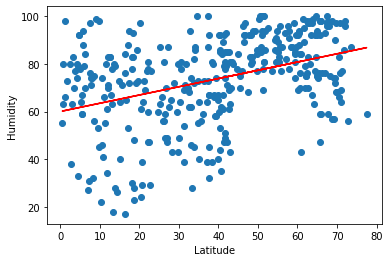

In [59]:
x_values = norther_hemi_df["Lat"]
y_values = norther_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.1707228599994713


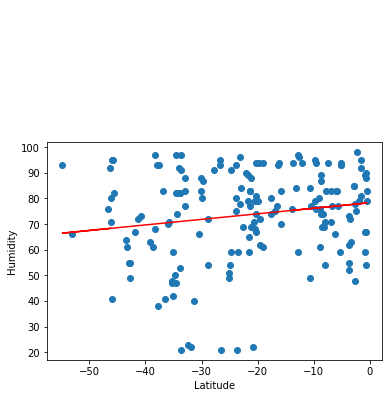

In [60]:
x_values = souther_hemi_df["Lat"]
y_values = souther_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-30,150))



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.8439054803259126


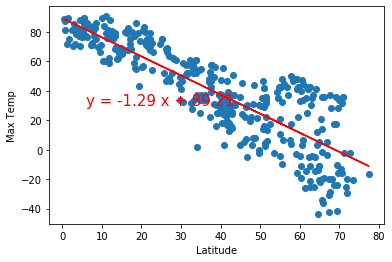

In [61]:
x_values = norther_hemi_df["Lat"]
y_values = norther_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,30))



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.14175897795964695


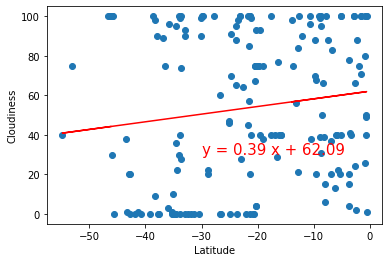

In [62]:
x_values = souther_hemi_df["Lat"]
y_values = souther_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-30,30))



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.19651460465024317


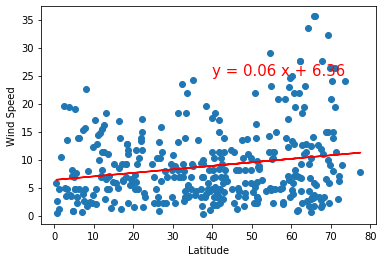

In [63]:
x_values = norther_hemi_df["Lat"]
y_values = norther_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(40,25))



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.21498334116675832


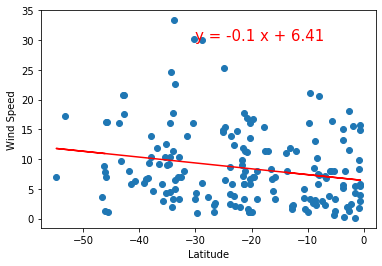

In [64]:
x_values = souther_hemi_df["Lat"]
y_values = souther_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-30,30))
